<a href="https://colab.research.google.com/github/JyotiPrajapati12/Digital_image_processing_project/blob/main/DIP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the dataset folder
dataset_path = '/content/drive/MyDrive/lung_cancer/lung_cancer'


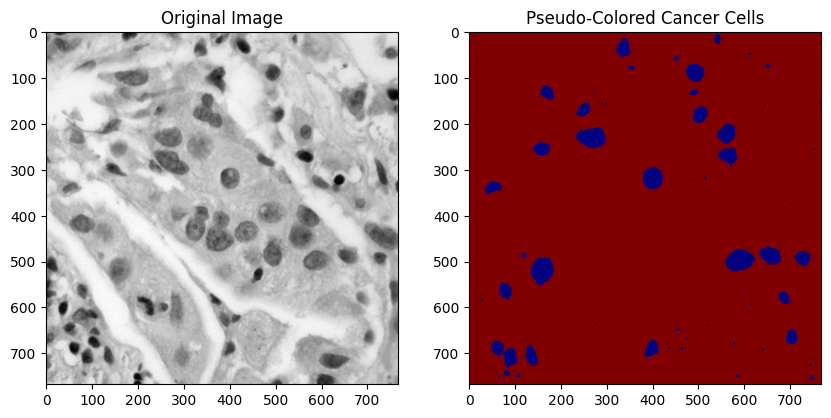

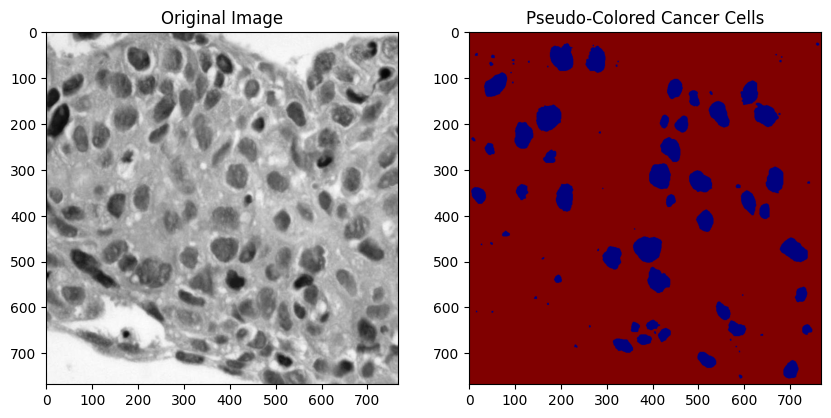

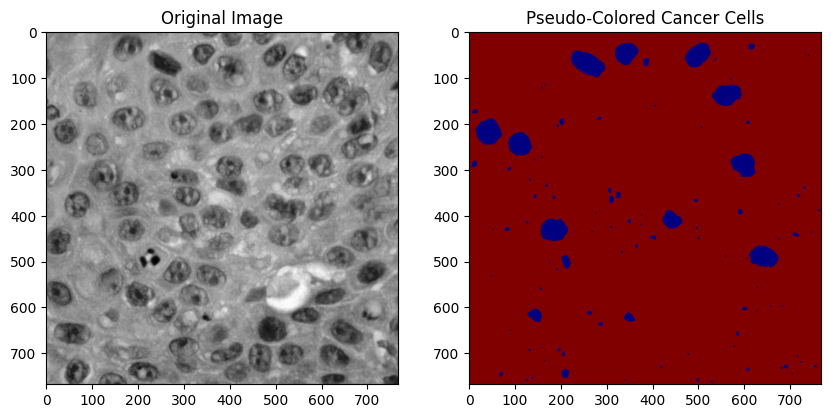

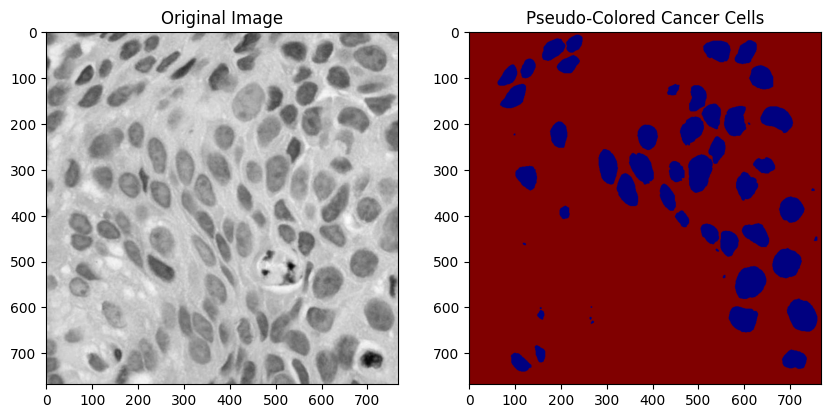

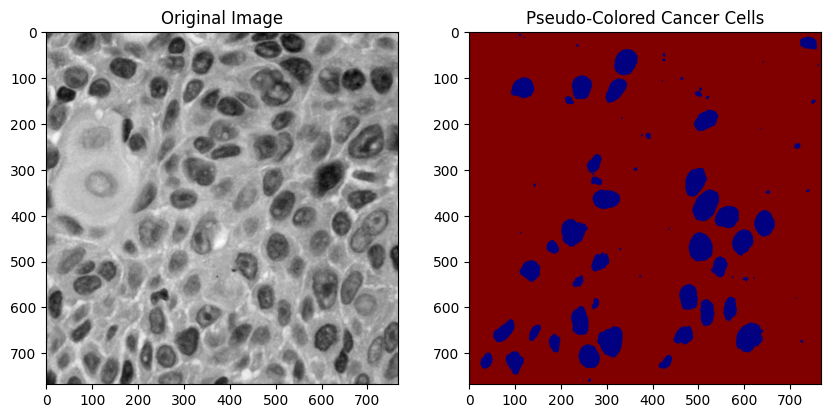

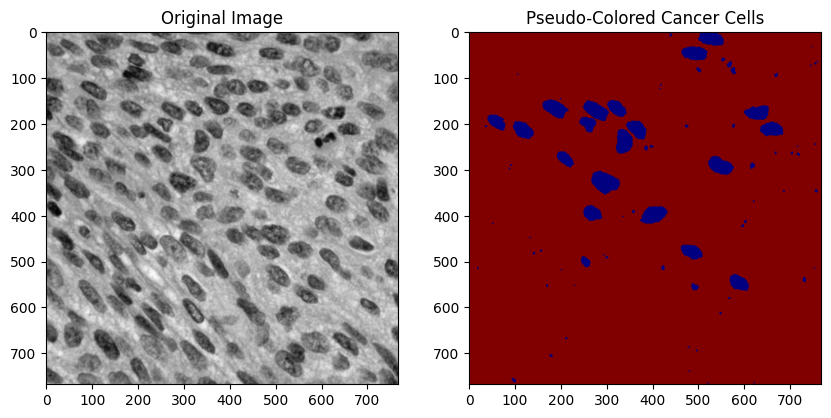

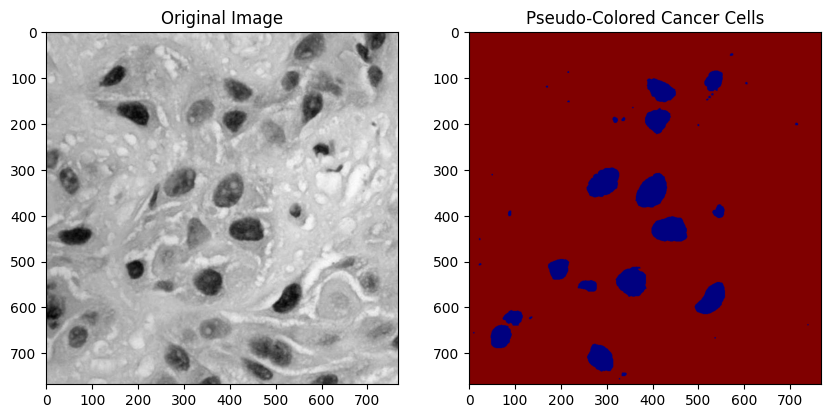

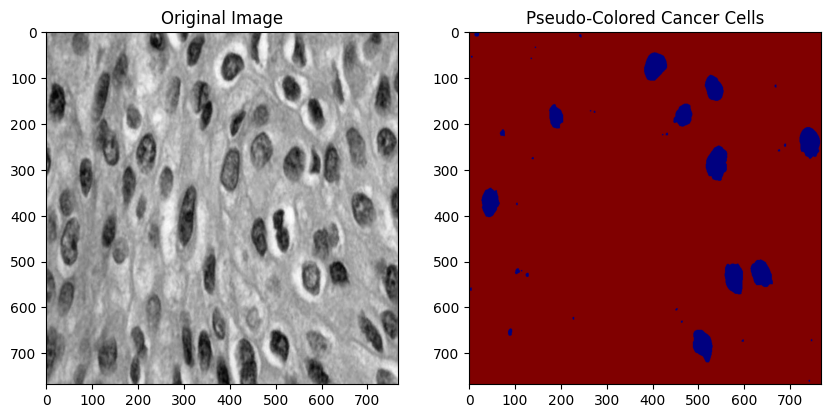

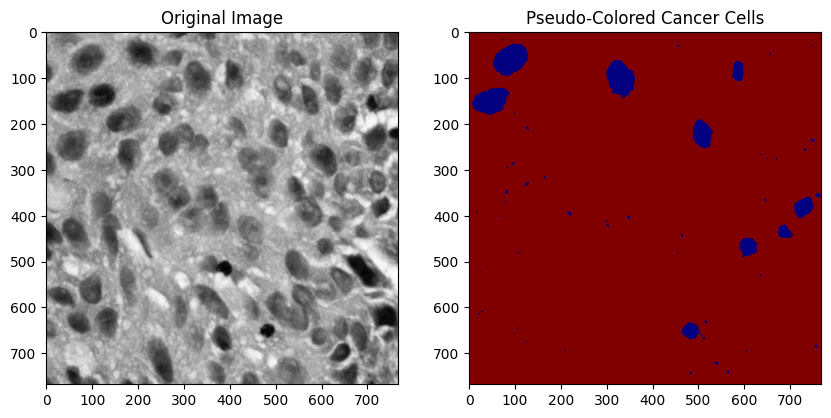

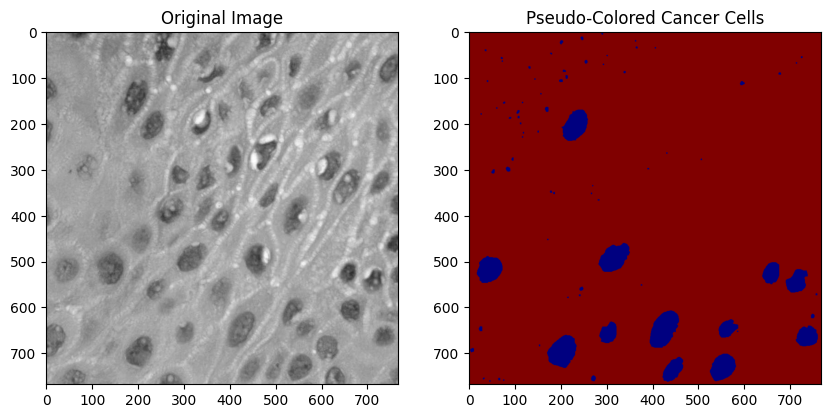

In [6]:
# List all image files in the dataset folder
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

for image_file in image_files:
    # Load the image
    image_path = os.path.join(dataset_path, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Threshold the image to create binary mask
    _, binary_mask = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Detect edges using Canny Edge Detection
    edges = cv2.Canny(binary_mask, 50, 150)

    # Find contours of the cells
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank mask to draw circular cells
    circular_cells = np.zeros_like(image)

    # Filter contours for circularity
    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        if perimeter == 0:
            continue
        circularity = 4 * np.pi * (area / (perimeter ** 2))
        if 0.7 <= circularity <= 1.2:  # Range for circular shapes
            cv2.drawContours(circular_cells, [contour], -1, 255, -1)

    # Apply pseudo-color transformation
    colored_image = cv2.applyColorMap(circular_cells, cv2.COLORMAP_JET)

    # Display the results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(colored_image)
    plt.title('Pseudo-Colored Cancer Cells')
    plt.show()
